### This is a notebook for segmenting fiber objects from collagen (or other) channel images. This notebook also provides visualizations and post-processing to extract other relevant fiber features

In [6]:
import os
import matplotlib.pyplot as plt

from ark.utils import load_utils, data_utils
import ark.segmentation.fiber_segmentation as fibseg

If you would like to stitch images from an external drive, see [External Hard Drives and Google File Stream](https://github.com/angelolab/ark-analysis#external-hard-drives-and-google-file-stream). Otherwise all data, images, files, etc. must be placed in the 'data' directory, and referenced via `'../data/path_to_your_data'`.

In [ ]:
base_dir = '../data/example_dataset'
input_dir = os.path.join(base_dir, 'image_data')
out_dir = os.path.join(base_dir, 'fiber_segmentation_processed_data')

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

### Download the Example Dataset
If you would like to test the features in Ark with an example dataset, run the cell below. It will download a dataset consisting of 11 FOVs with 22 channels.

In [ ]:
data_utils.download_example_data(save_dir=base_dir)

### Here you may load in an example FOV and test the segmentation parameters below, before running on your entire dataset.

The segmentation parameters are as follows:
 - `blur`: Gaussian blur radius used for initial blurring
 - `CSD`: Contrast Scaling Divisor.  This is used to determine the size of the window used for local contrast enhancement.  This should roughly be the length scale (in pixels) of your fibers, and should generally be a power of 2. (i.e 64, 128, 256, etc). 
 - `fiber_widths`: Expected pixel widths of fibers. Be aware that including larger widths can make smaller fibers harder to resolve.
 - `ridge_cutoff`: Intensity cutoff post meijering filtering. Increasing this value will decrease the number of fibers.
 - `sobel_blur`: Determines the elevation map used for watershed segmentation.  Try increasing this if it seems your longer fibers are being divided into smaller fibers
 - `min_fiber_size`: Minimum area of a fiber object.  Objects with an area less than this are removed

In [ ]:
example_fov_name = 'fov1'
fiber_channel_name = 'Collagen1'

blur = 2
CSD = 128
fiber_widths = (2, 4)
ridge_cutoff = 0.1
sobel_blur = 2
min_fiber_size = 100

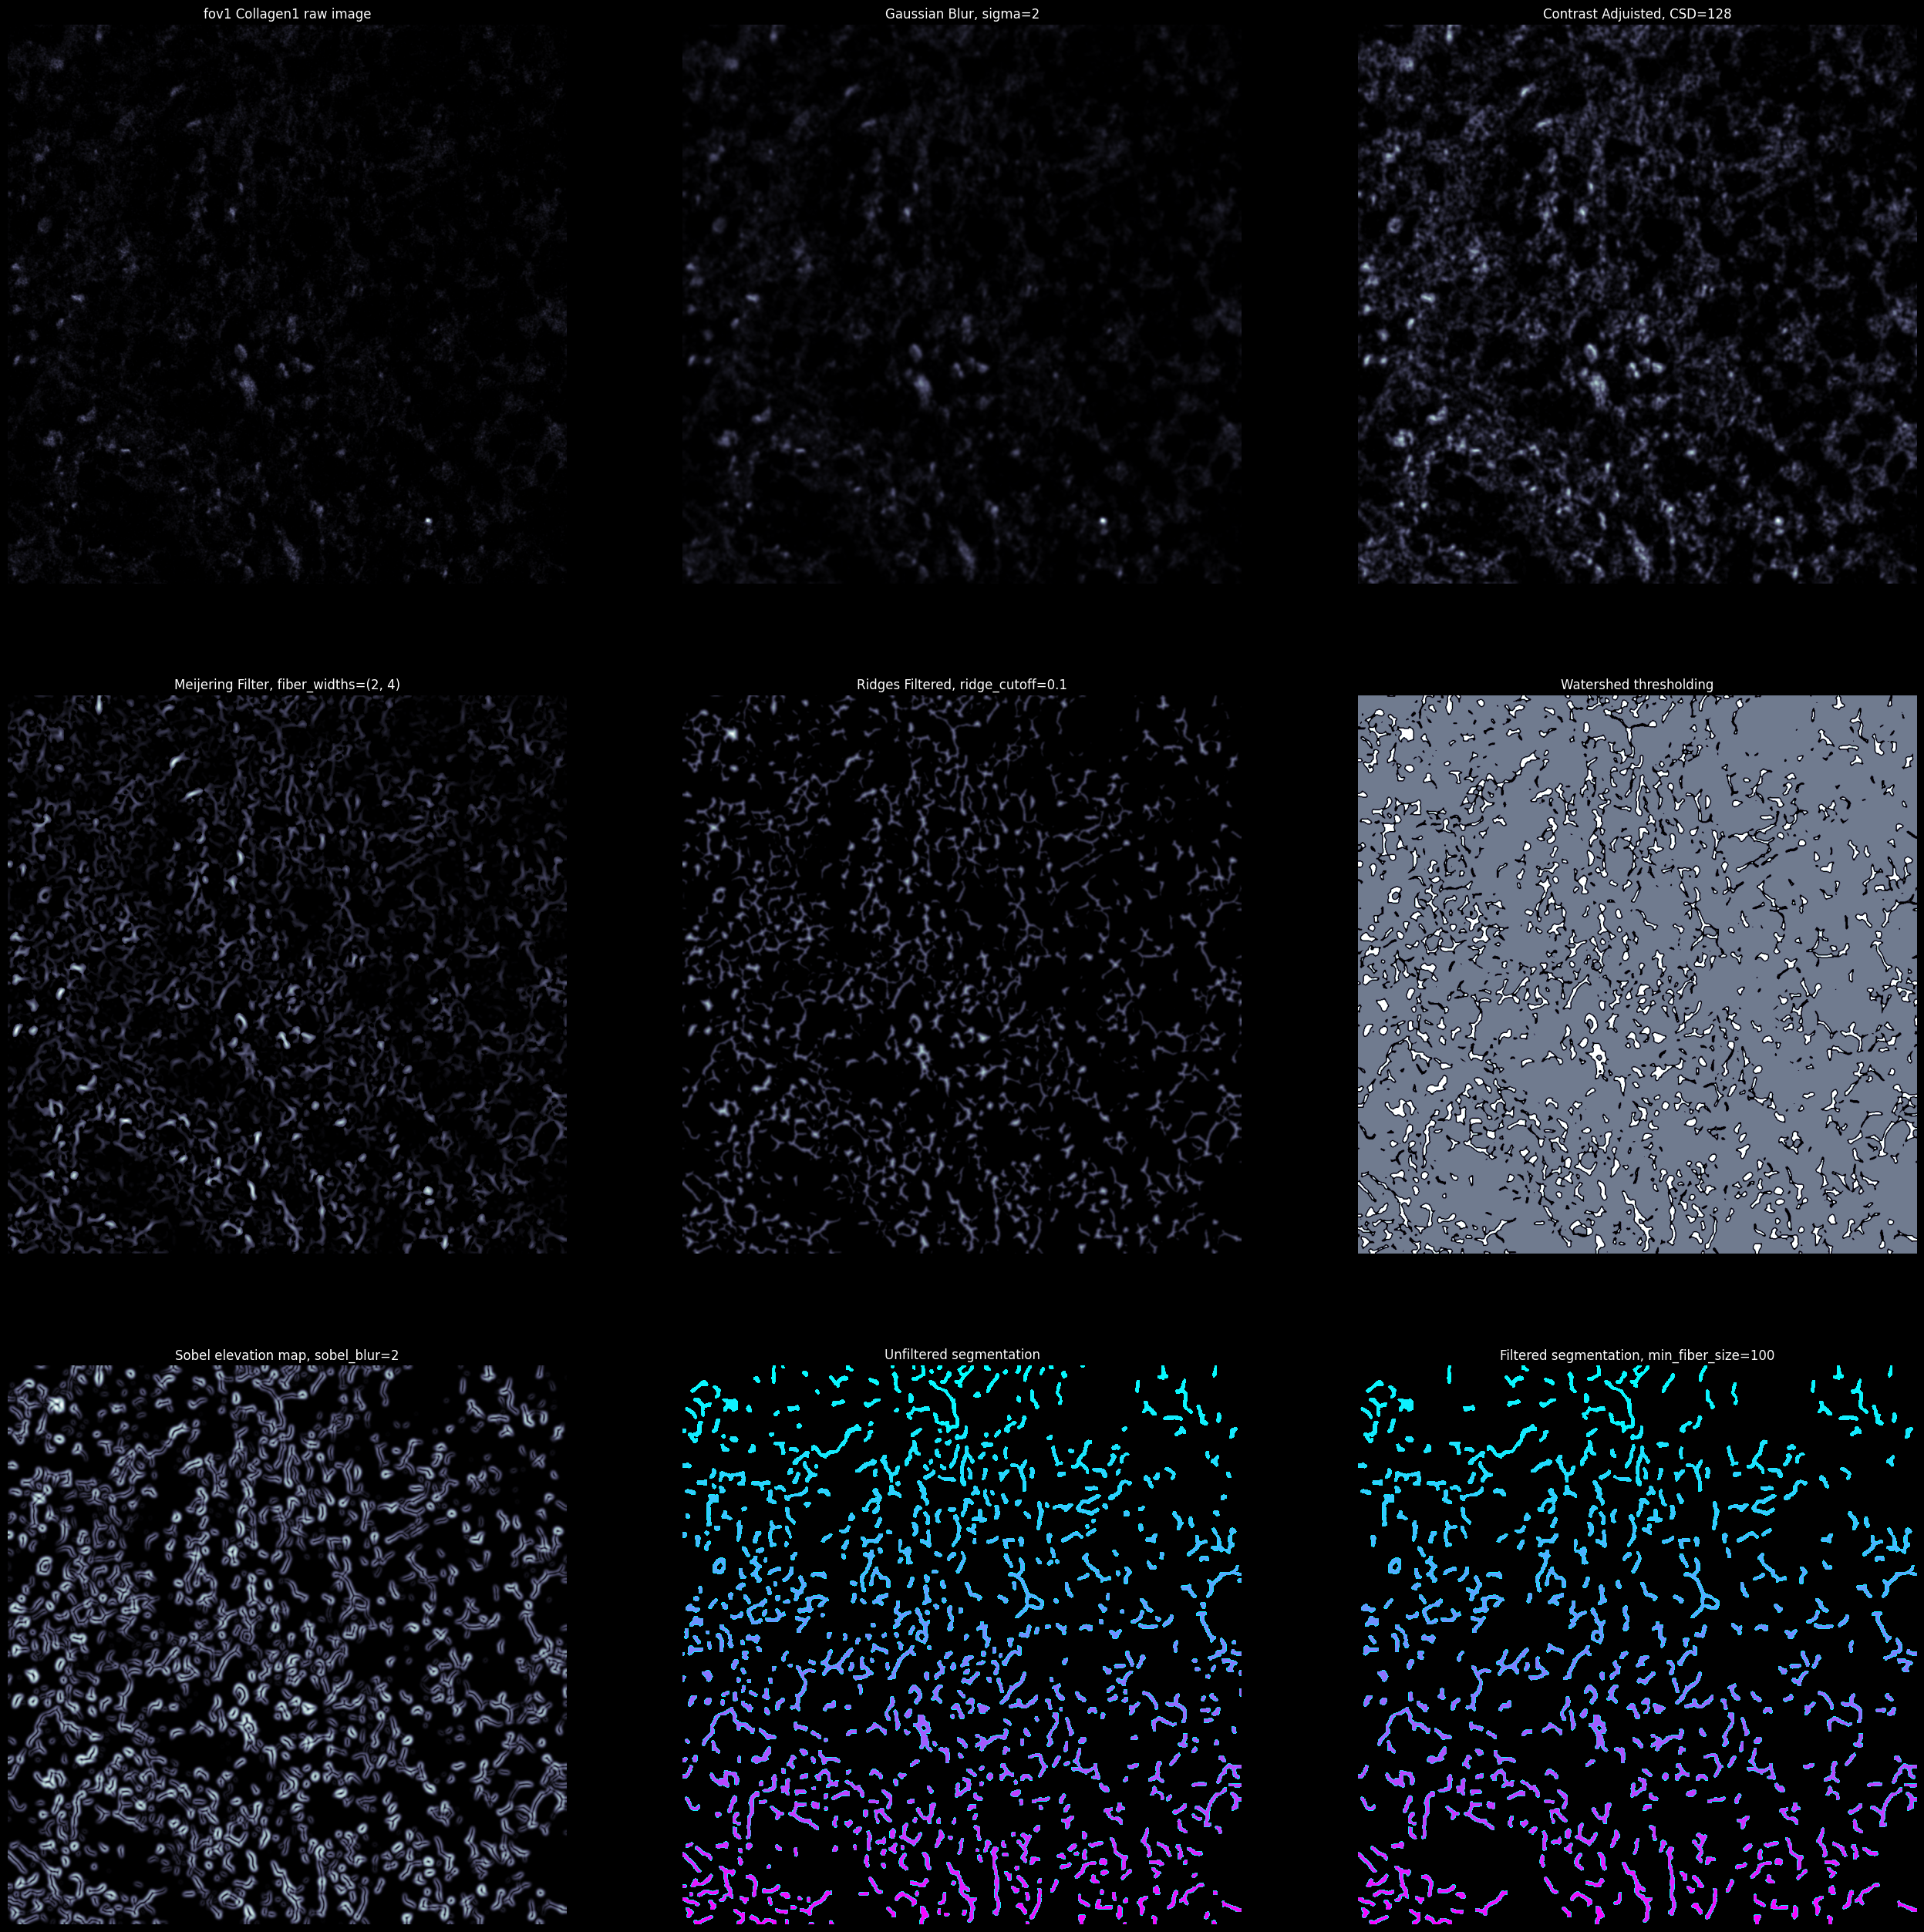

In [7]:
plt.style.use('dark_background')
fibseg.plot_fiber_segmentation_steps(input_dir, example_fov_name, fiber_channel_name,
    img_sub_folder=None,
    blur=blur,
    contrast_scaling_divisor=CSD,
    fiber_widths=fiber_widths,
    ridge_cutoff=ridge_cutoff,
    sobel_blur=sobel_blur,
    min_fiber_size=min_fiber_size
)
plt.gcf().set_size_inches((32, 32))


### This cell performs the segmentation with the above parameters over all of the dataset

If you need to see all of the steps in the segmentation process for each FOV, set `debug=True`. This is not recommended, since this will save 4 additional images per FOV.  But if you suspect there's a problem with the segmentation on certain FOVs, run the `debug=True` flag only a limited subset of your data, or better yet, re-run the above cells on those FOVs.

The function saves the fiber object table as a csv, and the labeled images as tiff files.

In [ ]:
fiber_table = fibseg.run_fiber_segmentation(input_dir, fiber_channel_name, out_dir,
    img_sub_folder=None,
    blur=blur,
    contrast_scaling_divisor=CSD,
    fiber_widths=fiber_widths,
    ridge_cutoff=ridge_cutoff,
    sobel_blur=sobel_blur,
    min_fiber_size=min_fiber_size,
    debug=False,
)